# Jordan Data Test

In [53]:
import pandas as pd
import numpy as np
import missingno as mo

# For pre-processing data 
from sklearn import preprocessing as pp 
from sklearn.compose import ColumnTransformer 

# For splits and CV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold # Cross validation 
from sklearn.model_selection import cross_validate # Cross validation 
from sklearn.model_selection import GridSearchCV # Cross validation + param. tuning.

# Machine learning methods 
from sklearn.linear_model import LinearRegression as LM
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.tree import DecisionTreeRegressor as DTree
from sklearn import tree # For plotting the decision tree rules
from sklearn.ensemble import BaggingRegressor as Bag
from sklearn.ensemble import RandomForestRegressor as RF

# For evaluating our model's performance
import sklearn.metrics as m

# Pipeline to combine modeling elements
from sklearn.pipeline import Pipeline

In [83]:
from plotnine import *
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv("ML-repression-study/arabbaro/arabbaro_jo_labeled_reduced.csv")

In [28]:
df.columns

Index(['Unnamed: 0', 'y', 'medinc', 'lowinc', 'highinc', 'remit', 'hijab',
       'married', 'employed', 'selfemp', 'retired', 'housewife', 'student',
       'unemp', 'pubsec', 'privsec', 'neighbrich', 'educ', 'male', 'age',
       'orgmem', 'charity', 'petit', 'protest', 'polviol', 'campaign_attend',
       'parlvote', 'locvote', 'internet', 'socmed', 'infosource',
       'y_dem_top_issue', 'y_dem_pref', 'y_dem_pref_not_in_dem', 'y_trust_gov',
       'y_trust_army', 'y_trust_pres_prime', 'y_trust_ikhwan'],
      dtype='object')

In [29]:
df.drop(['Unnamed: 0'], axis = 1, inplace=True)

In [30]:
df

,y,medinc,lowinc,highinc,remit,hijab,married,employed,selfemp,retired,...,internet,socmed,infosource,y_dem_top_issue,y_dem_pref,y_dem_pref_not_in_dem,y_trust_gov,y_trust_army,y_trust_pres_prime,y_trust_ikhwan
0,True,True,NaN,1.0,3.0,NaN,False,False,False,False,...,1,2.0,1,False,False,False,True,False,False,False
1,True,False,2.0,NaN,4.0,NaN,True,False,False,False,...,1,2.0,6,False,True,False,True,False,False,False
2,True,True,NaN,4.0,4.0,NaN,True,False,False,False,...,2,2.0,1,False,True,True,True,False,False,False
3,True,False,2.0,NaN,4.0,NaN,True,True,False,False,...,1,4.0,6,False,False,False,True,False,False,False
4,True,True,NaN,2.0,4.0,1.0,True,False,True,False,...,2,3.0,6,False,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,True,True,NaN,6.0,4.0,1.0,True,False,False,True,...,1,3.0,6,False,True,True,True,False,False,False
2396,True,True,NaN,5.0,4.0,NaN,True,False,False,False,...,1,3.0,6,False,True,False,True,False,False,False
2397,True,False,99.0,NaN,4.0,1.0,True,False,False,True,...,1,2.0,5,False,True,True,True,False,False,False
2398,True,True,NaN,2.0,4.0,NaN,True,False,False,False,...,6,NaN,5,False,True,True,True,False,False,False


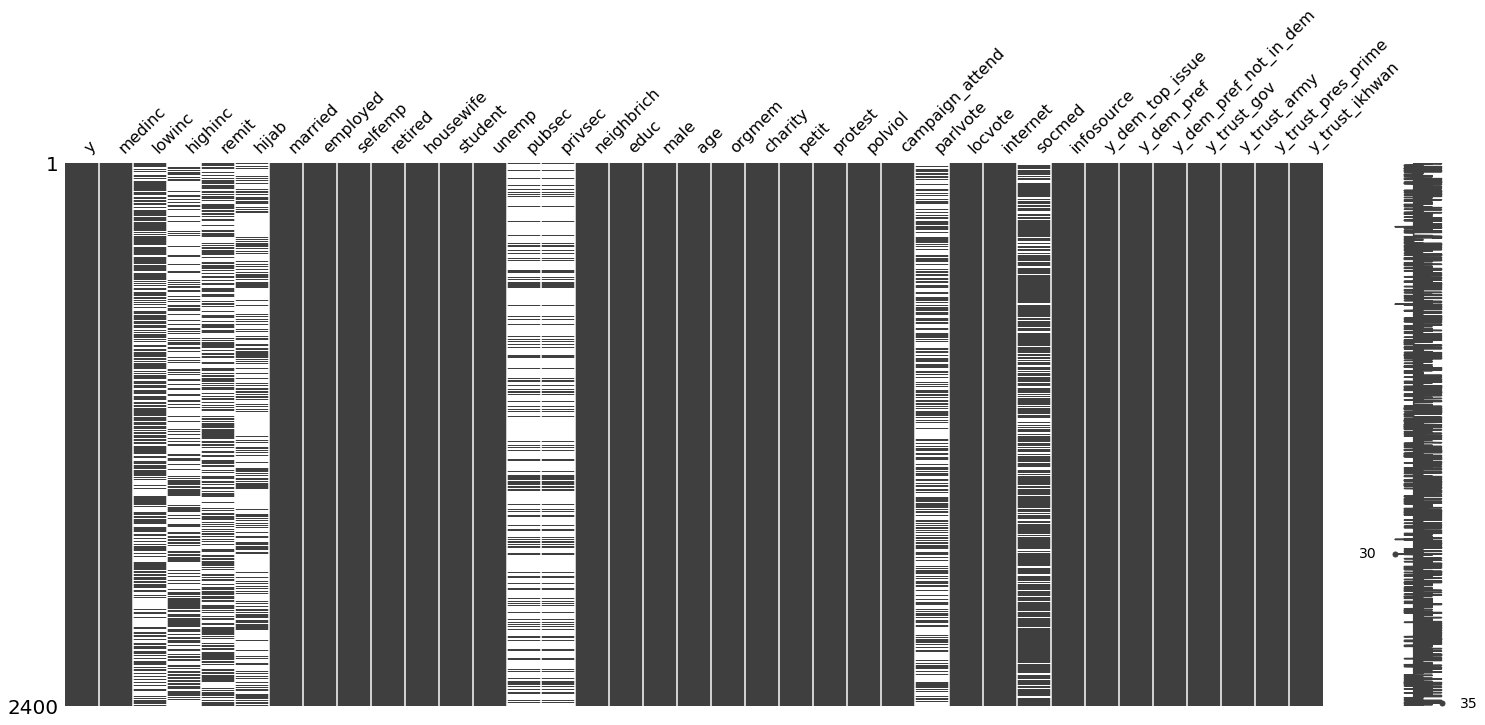

In [31]:
mo.matrix(df)

In [32]:
# I think we should drop medinc and highincome and just make lowincome a dummy variable
df["lowinc"] = np.where(df["lowinc"].isna(), 0, 1)

,y,medinc,lowinc,highinc,remit,hijab,married,employed,selfemp,retired,...,internet,socmed,infosource,y_dem_top_issue,y_dem_pref,y_dem_pref_not_in_dem,y_trust_gov,y_trust_army,y_trust_pres_prime,y_trust_ikhwan
0,True,True,0,1.0,3.0,NaN,False,False,False,False,...,1,2.0,1,False,False,False,True,False,False,False
1,True,False,1,NaN,4.0,NaN,True,False,False,False,...,1,2.0,6,False,True,False,True,False,False,False
2,True,True,0,4.0,4.0,NaN,True,False,False,False,...,2,2.0,1,False,True,True,True,False,False,False
3,True,False,1,NaN,4.0,NaN,True,True,False,False,...,1,4.0,6,False,False,False,True,False,False,False
4,True,True,0,2.0,4.0,1.0,True,False,True,False,...,2,3.0,6,False,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,True,True,0,6.0,4.0,1.0,True,False,False,True,...,1,3.0,6,False,True,True,True,False,False,False
2396,True,True,0,5.0,4.0,NaN,True,False,False,False,...,1,3.0,6,False,True,False,True,False,False,False
2397,True,False,1,NaN,4.0,1.0,True,False,False,True,...,1,2.0,5,False,True,True,True,False,False,False
2398,True,True,0,2.0,4.0,NaN,True,False,False,False,...,6,NaN,5,False,True,True,True,False,False,False


In [33]:
df.drop(['medinc', 'highinc'], axis = 1, inplace=True)

In [37]:
# prob drop this considering all the nas
df.remit.value_counts(dropna=False)

NaN    1186
4.0    1136
2.0      32
1.0      23
3.0      23
Name: remit, dtype: int64

In [39]:
df.drop(['remit'], axis = 1, inplace=True)

In [41]:
# yeah drop this too
df.hijab.value_counts(dropna=False)

NaN     1564
1.0      798
2.0       32
99.0       4
3.0        2
Name: hijab, dtype: int64

In [42]:
df.drop('hijab', axis = 1, inplace=True)

In [45]:
# this is almost entirely na
df.pubsec.value_counts(dropna=False)

NaN      1806
False     342
True      252
Name: pubsec, dtype: int64

In [46]:
df.drop(['pubsec', "privsec"], axis = 1, inplace=True)

In [47]:
df

,y,lowinc,married,employed,selfemp,retired,housewife,student,unemp,neighbrich,...,internet,socmed,infosource,y_dem_top_issue,y_dem_pref,y_dem_pref_not_in_dem,y_trust_gov,y_trust_army,y_trust_pres_prime,y_trust_ikhwan
0,True,0,False,False,False,False,False,True,False,3,...,1,2.0,1,False,False,False,True,False,False,False
1,True,1,True,False,False,False,True,False,False,2,...,1,2.0,6,False,True,False,True,False,False,False
2,True,0,True,False,False,False,True,False,False,2,...,2,2.0,1,False,True,True,True,False,False,False
3,True,1,True,True,False,False,False,False,False,1,...,1,4.0,6,False,False,False,True,False,False,False
4,True,0,True,False,True,False,False,False,False,2,...,2,3.0,6,False,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,True,0,True,False,False,True,False,False,False,1,...,1,3.0,6,False,True,True,True,False,False,False
2396,True,0,True,False,False,False,True,False,False,3,...,1,3.0,6,False,True,False,True,False,False,False
2397,True,1,True,False,False,True,False,False,False,3,...,1,2.0,5,False,True,True,True,False,False,False
2398,True,0,True,False,False,False,True,False,False,3,...,6,NaN,5,False,True,True,True,False,False,False


In [49]:
df.drop('parlvote', axis = 1, inplace=True)

In [50]:
# it's probably better to impute this somehow but I'm gonna drop just for purposes of testing out the model
df.socmed.value_counts(dropna=False)

2.0     1070
NaN      500
3.0      490
4.0      156
5.0      106
1.0       68
98.0      10
Name: socmed, dtype: int64

In [51]:
df.drop('socmed', axis = 1, inplace=True)

In [75]:
df.replace({False:0, True:1}, inplace=True)

In [76]:
df

,y,lowinc,married,employed,selfemp,retired,housewife,student,unemp,neighbrich,...,locvote,internet,infosource,y_dem_top_issue,y_dem_pref,y_dem_pref_not_in_dem,y_trust_gov,y_trust_army,y_trust_pres_prime,y_trust_ikhwan
0,1,0,0,0,0,0,0,1,0,3,...,2,1,1,0,0,0,1,0,0,0
1,1,1,1,0,0,0,1,0,0,2,...,1,1,6,0,1,0,1,0,0,0
2,1,0,1,0,0,0,1,0,0,2,...,2,2,1,0,1,1,1,0,0,0
3,1,1,1,1,0,0,0,0,0,1,...,2,1,6,0,0,0,1,0,0,0
4,1,0,1,0,1,0,0,0,0,2,...,1,2,6,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,1,0,1,0,0,1,0,0,0,1,...,2,1,6,0,1,1,1,0,0,0
2396,1,0,1,0,0,0,1,0,0,3,...,2,1,6,0,1,0,1,0,0,0
2397,1,1,1,0,0,1,0,0,0,3,...,1,1,5,0,1,1,1,0,0,0
2398,1,0,1,0,0,0,1,0,0,3,...,2,6,5,0,1,1,1,0,0,0


In [88]:
# set up SKLearn Framework
y = df.y
X = df.drop(columns = ["y", "y_dem_top_issue", "y_dem_pref", "y_dem_pref_not_in_dem", "y_trust_gov", "y_trust_army", "y_trust_pres_prime",	"y_trust_ikhwan"])

In [90]:
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=.25,random_state=1234)

In [91]:
# (1) Set the folds index to ensure comparable samples
fold_generator = KFold(n_splits=5, shuffle=True,random_state=111)


# (3) Next Let's create our model pipe (note for the model we leave none as a placeholder)
pipe = Pipeline(steps=[('pre_process', pp.MinMaxScaler()),
                       ('model',None)])


# (4) Specify the models and their repsective tuning parameters. 
# Note the naming convention here to reference the model key
search_space = [
    # Linear Model
    {'model' : [LM()]},
    
    # KNN with K tuning param
    {'model' : [KNN()],
     'model__n_neighbors':[10,15,20,25,30]},
    
    # Decision Tree with the Max Depth Param
    {'model': [DTree()],
     'model__max_depth':[1,2,3,5]},
    
    # The Bagging decision tree model 
    {'model': [Bag()]},
    
    # Random forest with the N Estimators tuning param
    {'model' : [RF()],
     'model__max_depth':[1,2,3],
     'model__n_estimators':[500,1000,1250]},
]


# (5) Put it all together in the grid search
search = GridSearchCV(pipe, search_space, 
                      cv = fold_generator,
                      scoring='neg_mean_squared_error',
                      n_jobs=4)

# (6) Fit the model to the training data
search.fit(train_X,train_y)

GridSearchCV(cv=KFold(n_splits=5, random_state=111, shuffle=True),
             estimator=Pipeline(steps=[('pre_process', MinMaxScaler()),
                                       ('model', None)]),
             n_jobs=4,
             param_grid=[{'model': [LinearRegression()]},
                         {'model': [KNeighborsRegressor()],
                          'model__n_neighbors': [10, 15, 20, 25, 30]},
                         {'model': [DecisionTreeRegressor()],
                          'model__max_depth': [1, 2, 3, 5]},
                         {'model': [BaggingRegressor()]},
                         {'model': [RandomForestRegressor(max_depth=3,
                                                          n_estimators=500)],
                          'model__max_depth': [1, 2, 3],
                          'model__n_estimators': [500, 1000, 1250]}],
             scoring='neg_mean_squared_error')

In [92]:
search.best_score_

-0.23989365759386846

In [93]:
search.best_params_

{'model': RandomForestRegressor(max_depth=3, n_estimators=500),
 'model__max_depth': 3,
 'model__n_estimators': 500}

In [106]:
# Test
pred_y = search.predict(test_X)

In [107]:
m.mean_squared_error(test_y,pred_y)

0.24080527174367133

In [108]:
m.roc_auc_score(test_y,pred_y)

0.5620648920186715

In [117]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [126]:
gnb.fit(train_X, train_y)

GaussianNB()

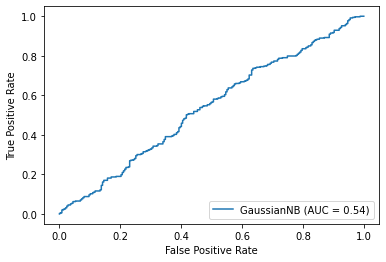

In [127]:
m.plot_roc_curve(gnb, test_X, test_y)

In [128]:
pred2_y = gnb.predict(test_X)

In [129]:
m.roc_auc_score(test_y,pred2_y)

0.5125873083231067

In [130]:
m.mean_squared_error(test_y,pred2_y)

0.43333333333333335

In [131]:
m.confusion_matrix(test_y, pred2_y)

array([[ 51, 196],
       [ 64, 289]])

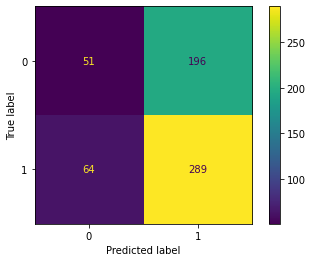

In [133]:
m.plot_confusion_matrix(estimator= gnb,
                     X = test_X,
                     y_true = test_y,
                     values_format='.5g')